In [8]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, matplotlib
from ete3 import PhyloTree, TreeStyle, NodeStyle, TextFace, RectFace, StackedBarFace

In [4]:
Repeats = pd.read_csv('../data/DataFrame/Repeats.tsv', sep = '\t')

some extra info

In [5]:
fishinfo = pd.read_csv('../data/metadata/names.tab', sep = '\t')
alias_common_name = fishinfo.set_index('ALIAS')['COMMON_NAME'].to_dict()
alias_family = fishinfo.set_index('ALIAS')['FAMILY'].to_dict()
alias_species = dict(fishinfo.set_index('ALIAS')['SPECIES'])

# Order, alias dict
d = fishinfo.groupby('ORDER')['ALIAS'].groups
n_d = {}
for i in d:
    n_d[i] = [fishinfo.loc[x].ALIAS for x in d[i]]

In [9]:
def plotTreeSTR():
    tree101 = PhyloTree('../data/trees/ALIASES_NEWICK_101g_nucl_conc_28bfossils.combined.tre')
    ts = TreeStyle()
    n = 1
    fam_names = []
    c = 0
    for node in tree101.traverse(): 
        nstyle = NodeStyle()
        if node.is_leaf():

            species = Repeats[Repeats['Common_name']==alias_common_name[node.name].replace(' ', '_').replace("'", '')]
            fam_names.append(alias_family[node.name])
            
            if alias_species[node.name] == 'Lesueurigobius cf. sanzoi':
                common_name = TextFace('  ' + 'L. sanzoi'+ '   ', 
                                           ftype = 'Helvetica', fsize = 7000, fstyle = 'italic')
            else:
                common_name = TextFace('  ' + alias_species[node.name][0] + '. ' + alias_species[node.name].replace(' ', '_').replace("'", '').split('_')[1] + '   ', 
                                           ftype = 'Helvetica', fsize = 7000, fstyle = 'italic')
            common_name.background.color = 'linen'
            node.add_face(common_name, column=4, position = 'aligned')
            common_name.rotable = True
            
            ### STRs
            STRs = RectFace(width = Repeats[Repeats['Common_name']==alias_common_name[node.name].replace(' ', '_').replace("'", '')].sum_strs_per_mbp_unit10.values[0], 
                           fgcolor = 'black',
                           height = 10000, bgcolor = 'cornflowerblue')
            node.add_face(STRs, column = 7, position = 'aligned')
            stacked_array =     np.array([species.strs_bp_per_mbp_unit10_1.values[0],
                                species.strs_bp_per_mbp_unit10_2.values[0],
                                species.strs_bp_per_mbp_unit10_3.values[0],
                                species.strs_bp_per_mbp_unit10_4.values[0],
                                species.strs_bp_per_mbp_unit10_5.values[0] +
                                species.strs_bp_per_mbp_unit10_6.values[0] +
                                species.strs_bp_per_mbp_unit10_7.values[0] +
                                species.strs_bp_per_mbp_unit10_8.values[0] +
                                species.strs_bp_per_mbp_unit10_9.values[0] +
                                species.strs_bp_per_mbp_unit10_10.values[0]]) / species.sum_strs_per_mbp_unit10.values[0]
            sb = StackedBarFace(stacked_array * 100, height = 10000, width = 80000, line_color = 'black')  
            node.add_face(sb, column = 2, position = 'aligned')
            sb.rotable = False
            
            brood = str(Repeats[Repeats['ALIAS']==node.name].brood1.values[0])
            salt = str(Repeats[Repeats['ALIAS']==node.name].water_bin.values[0])
            brood_dict = {'nonguarders' : 'lightblue', 'bearers' : 'peachpuff', 'guarders' : 'peachpuff',
                          'nan' : 'lightgray'}
            salt_dict = {'1.0' : 'lightblue', '0.0' : 'lightgreen', 'nan': 'lightgray'}
            
            # Another bar with fresh or marine
            salt = str(Repeats[Repeats['ALIAS']==node.name].water_bin.values[0])
            if salt == str(1.0):
                color = 'peachpuff'
                S = RectFace(width = 10000, fgcolor = 'black',
                                   bgcolor = color, label = {'text' : 'F', 'color' : 'black', 'fontsize' : 1200},
                                   height = 10000) 
            elif salt == str(0.0):
                color = 'lightblue'
                S = RectFace(width = 10000, fgcolor = 'black',
                                   bgcolor = color, label = {'text' : 'S', 'color' : 'black', 'fontsize' : 1200},
                                   height = 10000) 

            elif salt == str('nan'):
                color = 'white'
                S = RectFace(width = 10000, fgcolor = 'black',
                               bgcolor = color,
                               height = 10000, label = {'text' : 'X', 'color' : 'black', 'fontsize' : 1000})
            node.add_face(S, column = 5, position = 'aligned')
            S.rotable = True
            # Another bar with guarder/bearer
            brood = str(Repeats[Repeats['ALIAS']==node.name].brood1_cat.values[0])

            if brood == 'b_g':
                color = 'peachpuff'
                B = RectFace(width = 10000, fgcolor = 'black', 
                                   bgcolor = color, label = {'text' : 'B/G', 'color' : 'black', 'fontsize' : 1200},
                                   height = 10000) 
            elif brood == 'ng':
                color = 'lightblue'
                B = RectFace(width = 10000, fgcolor = 'black', 
                                   bgcolor = color, label = {'text' : 'NG', 'color' : 'black', 'fontsize' : 1200},
                                   height = 10000) 

            elif brood == str('nan'):
                color = 'white'
                B = RectFace(width = 10000, fgcolor = 'black',
                               bgcolor = color,
                               height = 10000, label = {'text' : 'X', 'color' : 'black', 'fontsize' : 1000})
            node.add_face(B, column = 6, position = 'aligned')
            B.rotable = True
            
            # Another empty white bar for phylogenetic names
            empt = RectFace(width = 10000, fgcolor = 'white',
                               bgcolor = 'white',
                               height = 10000, label = {'text' : '', 'color' : 'white', 'fontsize' : 1000})
            node.add_face(empt, column = 1, position = 'aligned')

            # GS
            cmap = plt.cm.Blues
            norm = matplotlib.colors.Normalize(vmin=19.1, vmax=21.2)
            sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
            color = matplotlib.colors.to_hex(sm.to_rgba(np.log(Repeats[Repeats.ALIAS == node.name].bp.values[0])))
            GS = RectFace(width = 10000, 
                           fgcolor = color,
                           height = 10000, bgcolor = color)  
            node.add_face(GS, column = 3, position = 'aligned')
            
    ### Background colors
    #ca = tree101.get_common_ancestor('fish_121', 'fish_120')
    #nst1 = NodeStyle()
    #nst1["bgcolor"] = "LightSteelBlue"
    #ca.set_style(nst1)
        
    ts.force_topology = False
    ts.tree_width = 2000
    ts.show_leaf_name = False
    ts.complete_branch_lines_when_necessary = True
    ts.draw_aligned_faces_as_table = True
    ts.draw_guiding_lines = False
    ts.mode = 'c'
    ts.arc_span = 350
    #tree101.render('../Figures/tree101_StackedBarsSTRs_fs_GS.pdf', tree_style=ts, w = 2000)
    #tree101.render('../Figures/tree101_StackedBarsSTRs_fs_GS.png', tree_style=ts, w = 600, dpi = 1000)
    return tree101.render("%%inline", tree_style=ts, w = 2000)

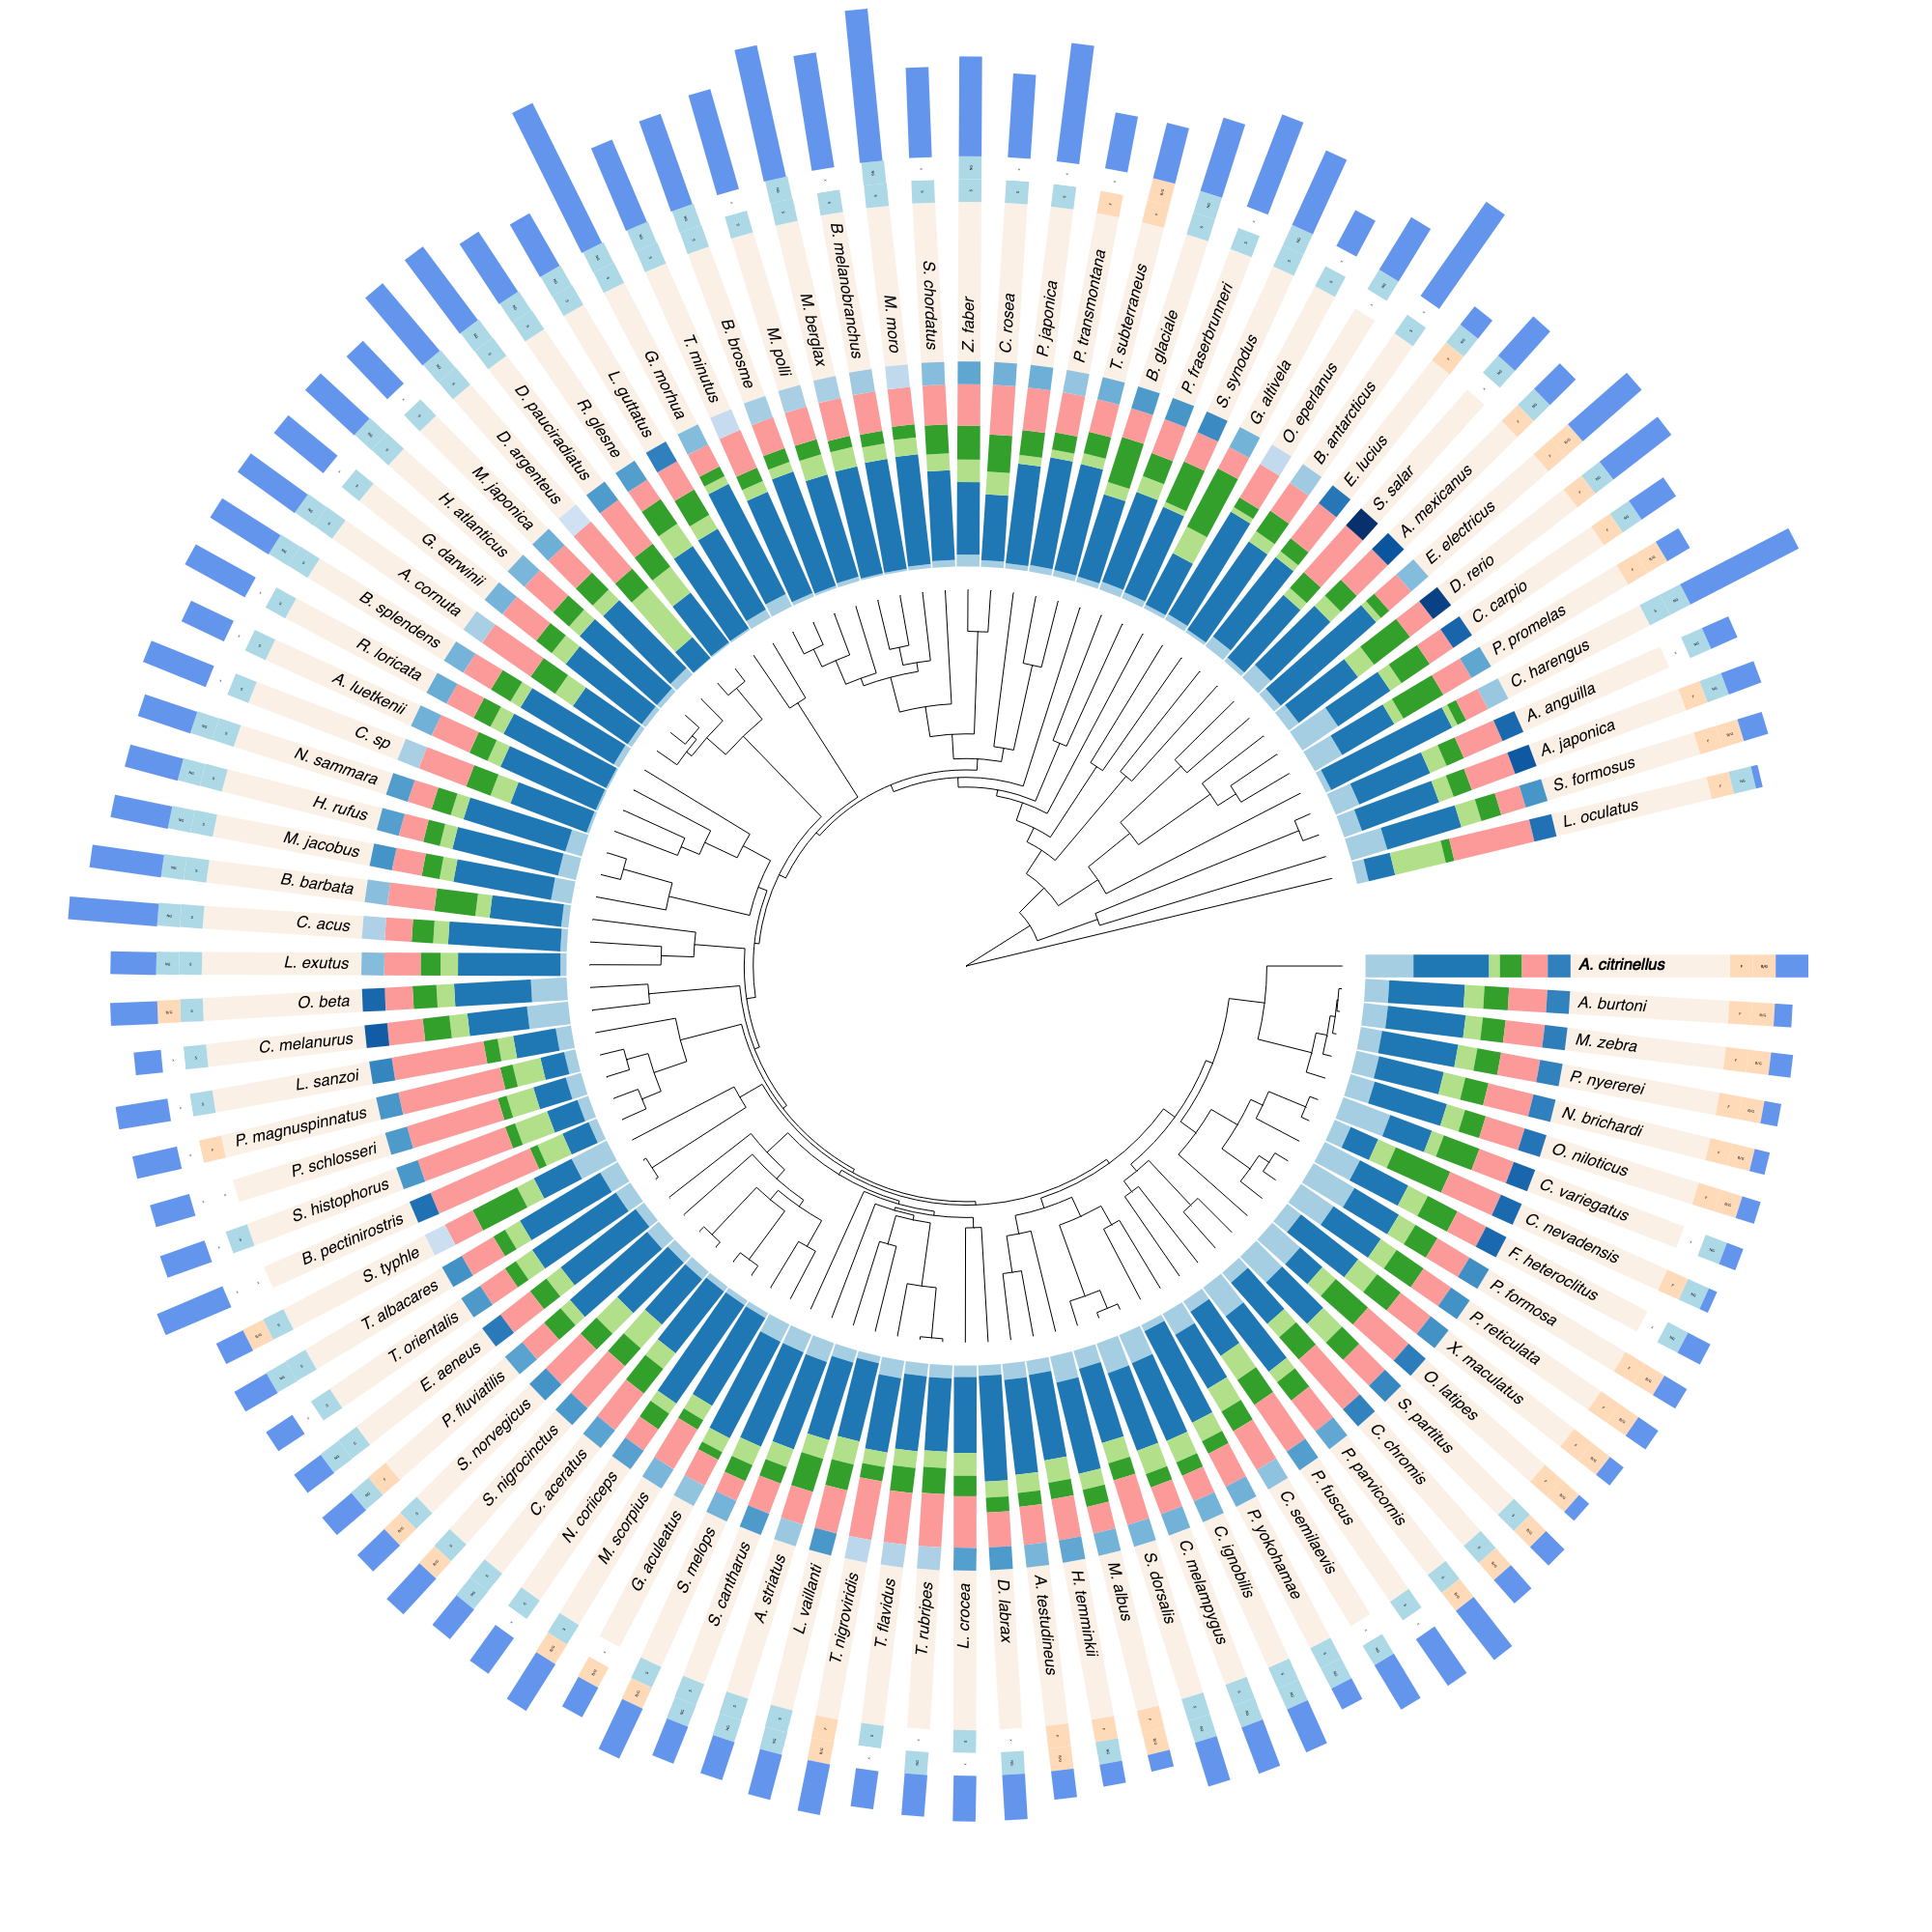

In [10]:
plotTreeSTR()

In [13]:
def plotTreeTE():
    tree101 = PhyloTree('../data/trees/ALIASES_NEWICK_101g_nucl_conc_28bfossils.combined.tre') # Zuza
    ts = TreeStyle()
    n = 1
    fam_names = []
    c = 0
    for node in tree101.traverse(): 
        nstyle = NodeStyle()
        if node.is_leaf():   
            
            ## set branch color to reflect to genome size
            
            
            species = Repeats[Repeats['Common_name']==alias_common_name[node.name].replace(' ', '_').replace("'", '')]

            fam_names.append(alias_family[node.name])
            
            if alias_species[node.name] == 'Lesueurigobius cf. sanzoi':
                common_name = TextFace('  ' + 'L. sanzoi'+ '   ', 
                                           ftype = 'Helvetica', fsize = 7000, fstyle = 'italic')
            else:
                common_name = TextFace('  ' + alias_species[node.name][0] + '. ' + alias_species[node.name].replace(' ', '_').replace("'", '').split('_')[1] + '   ', 
                                           ftype = 'Helvetica', fsize = 7000, fstyle = 'italic')
            
            node.add_face(common_name, column=4, position = 'aligned')
            common_name.rotable = True

            TEs = RectFace(width = Repeats[Repeats['Common_name']==alias_common_name[node.name].replace(' ', '_').replace("'", '')].TEs.values[0] * 1800, 
                           fgcolor = 'black',
                           height = 5000, bgcolor = 'lightblue')  
            node.add_face(TEs, column = 5, position = 'aligned')

            TEs = RectFace(width = Repeats[Repeats['Common_name']==alias_common_name[node.name].replace(' ', '_').replace("'", '')].Total.values[0] * 1800, 
                           fgcolor = 'black',
                           height = 5000, bgcolor = 'cornflowerblue')  
            node.add_face(TEs, column = 5, position = 'aligned')

            sb = StackedBarFace(np.array([species.DNA_frac.values[0], 
                                       species.LINEs_frac.values[0]+ 
                                       species.SINEs_frac.values[0],
                                       species.LTR_frac.values[0]]) * 100,
                                       height = 10000, width = 80000, line_color = 'black', 
                                       colors = ['lightcoral', 'cornflowerblue', 'lightsalmon'])  
            node.add_face(sb, column = 2, position = 'aligned')
            sb.rotable = False
            common_name.background.color = 'linen'
            
            # Another bar with GS
            cmap = plt.cm.Blues
            norm = matplotlib.colors.Normalize(vmin=19.1, vmax=21.2)
            sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
            color = matplotlib.colors.to_hex(sm.to_rgba(np.log(Repeats[Repeats.ALIAS == node.name].bp.values[0])))
            GS = RectFace(width = 10000, 
                           fgcolor = color,
                           height = 10000, bgcolor = color)  
            node.add_face(GS, column = 3, position = 'aligned')
            
            # Another empty white bar for phylogenetic names
            empt = RectFace(width = 10000, fgcolor = 'white',
                               bgcolor = 'white',
                               height = 10000, label = {'text' : '', 'color' : 'white', 'fontsize' : 1000})
            node.add_face(empt, column = 1, position = 'aligned')
            c += 1    
   
    ts.force_topology = False
    ts.tree_width = 1000
    ts.show_leaf_name = False
    ts.complete_branch_lines_when_necessary = True
    ts.draw_aligned_faces_as_table = True
    ts.draw_guiding_lines = False
    ts.mode = 'c'
    ts.arc_span = 350
    #ts.arc_start = 350
    #tree101.render('../figures/tree101_StackedBars.flashy_new.pdf', tree_style=ts, w = 600)
    #tree101.render('../figures/tree101_StackedBars.flashy_new.pdf', tree_style=ts, w = 600, dpi = 1000)
    return tree101.render("%%inline", tree_style=ts, w = 3000)
    

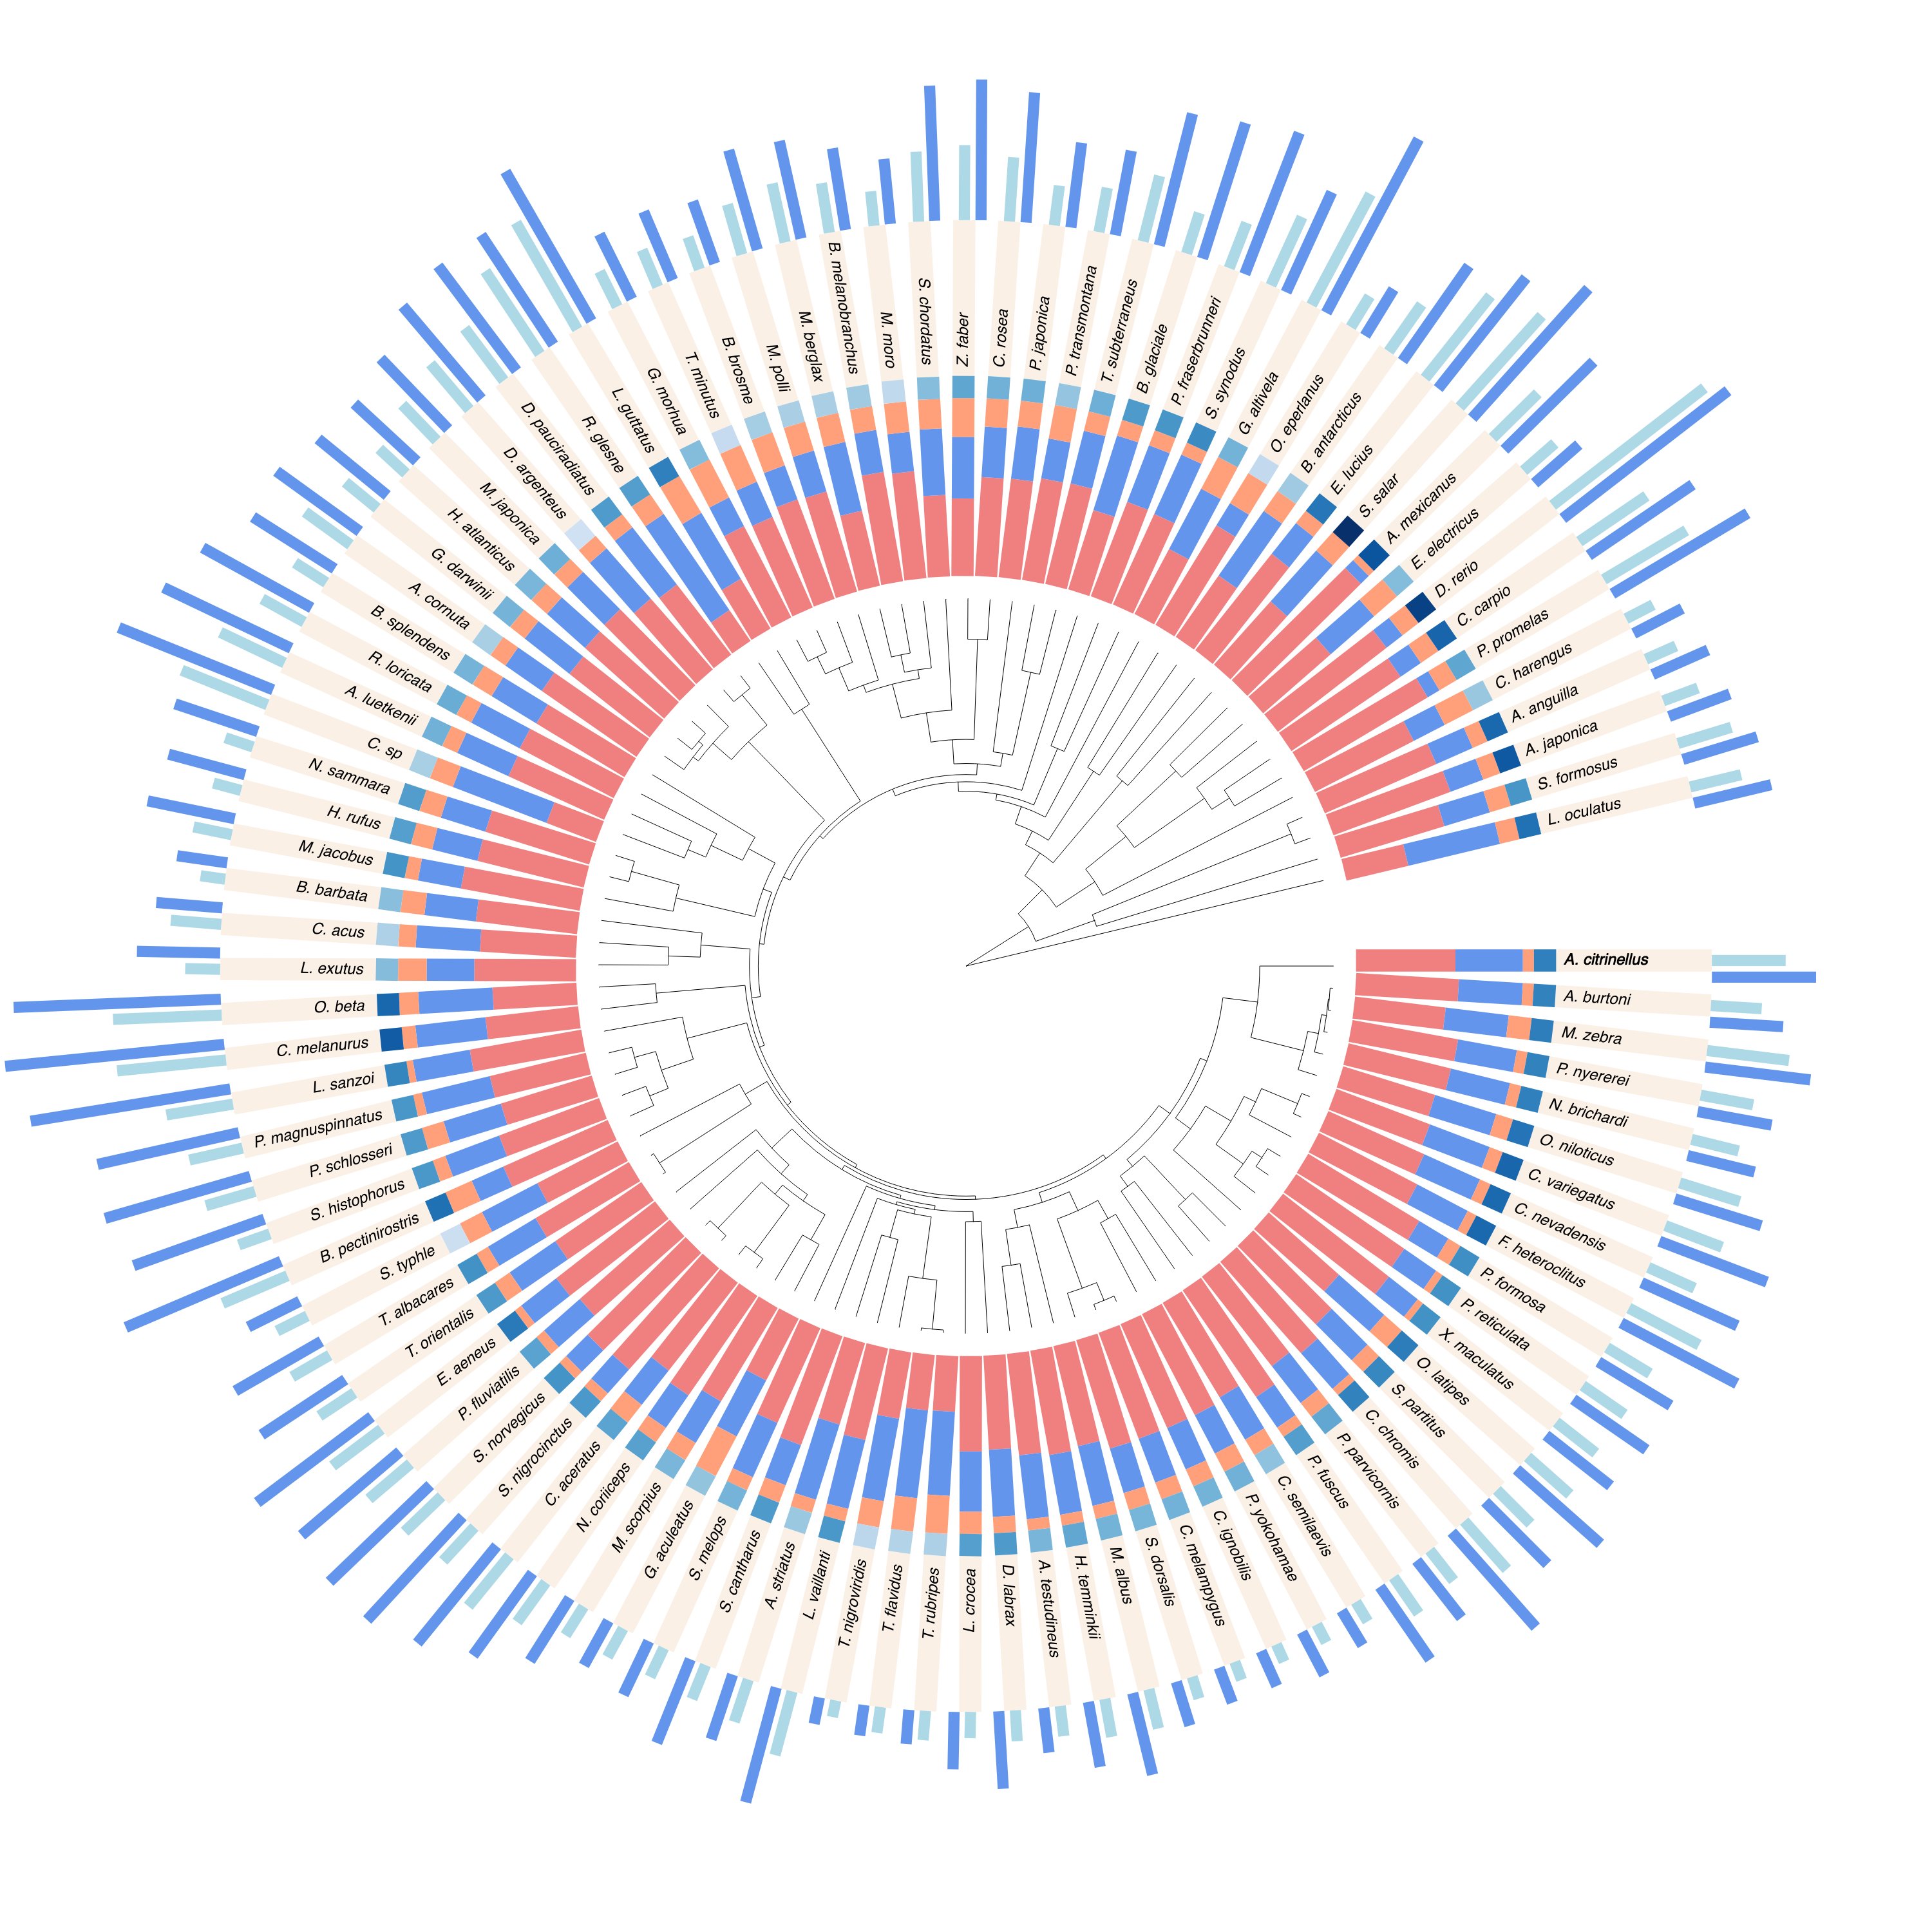

In [14]:
plotTreeTE()